<a href="https://colab.research.google.com/github/sarahroyle/SDA-Group-Work/blob/main/SDA_Report_Sarah_and_Cristina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Investigation of Variables that affect Misophonia Severity

Misophonia is a disorder in which certain sounds trigger emotional or physiological responses that some might perceive as unreasonable given the circumstance. Misophonia's mechanism is not known and there are currently no evidence-based treatments. 

Before 2016, the literature on misophonia was limited. Some small studies show that people with misophonia generally have strong negative feelings, thoughts, and physical reactions to specific sounds. These sounds usually appear quiet to others, but can seem loud to the person with misophonia. One study found that around 80% of the sounds were related to the mouth (e.g., eating, slurping, chewing or popping gum, whispering, whistling) and around 60% were repetitive. 

Reactions to trigger sounds can range from mild (anxiety, discomfort, and/or disgust) to severe (rage, anger, hatred, panic, fear, and/or emotional distress). In extreme cases, sufferers may become physically violent toward the source of the sound. 

In this investigation, we aim to identify if there is any correlation or link between misophonia and other charactistics such as cephalic measurements, anxiety or depression. We hope by identifying interacting factors, we may gain a better understanding of the condition and therefore how to treat it.

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
from scipy.stats import chisquare

After loading in the data set, we then removed rows with NANs in the Misofonia columns; as we are investigating the relationship between different variables and misofonia, these rows would be irrelevent in our analysis. This means we now have a clean data set to work with.

In [ ]:
df = pd.read_excel(io='https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/blob/main/datasets/misophoinia_data.xlsx?raw=true')
#Removing the rows that do not have a Misofonia score, as this will not be relevent for investigating the link between misofonia and other variables
# whilst also making the data cleaner
df = df.dropna(subset = ['Misofonia'])
df

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,...,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,...,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,...,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,...,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,...,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,...,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,si,3.0,casado,1.0,89.0,1.0,80.0,1.0,no,0.0,...,50.0,III,7.70,21.3,85.2,-5.2,2.0,17.0,15.0,-9.0
119,si,4.0,casado,1.0,96.0,1.0,97.0,1.0,si,1.0,...,31.0,III,6.02,5.0,80.2,2.5,0.0,21.0,17.0,1.0
120,si,2.0,casado,1.0,89.0,1.0,80.0,1.0,no,0.0,...,52.0,III,2.50,12.9,74.9,2.9,1.0,NaN,NaN,-9.0
121,si,3.0,soltero,0.0,95.0,1.0,85.0,1.0,si,1.0,...,48.0,II,19.00,5.9,107.6,8.1,2.0,17.0,17.0,-10.0


The description of the variables

* “Misofonia”: Binary (si: misophinic, no: no misophinic)
* “Misofonia.dic”: Categorical (0: no misophinic, 1: severity 1, 2: severity 
2, 3: severity 3, 4: severity 4)
* “Estado”: Marital status (casado: married, soltero: single, viuda: widow, divorciado:divorced)
* “Estado.dic”: Numeric Marital status
*  “ansiedad.rasgo”: Score from 0-100 with anxiety personality trait
*  “ansiedad.rasgo.dic”: Binary score (0,1) of anxiety personality trait
* “ansiedad.estado”: Score from 0-100 with current state of anxiety
*   “ansiedad.estado.dic”: Binary score (0,1) with current state of anxiety
*  “ansiedad.medicada”: Diagnosed with anxiety disorder (si, no)
*   “ansiedad.medicada.dic”: Diagnosed with anxiety disorder (1, 0)
*   “depresion”: Score from 0-50 with current state of depression
*  “depresion.dic” : Binary score (0,1) with current state of depression
*  “Sexo”: Male=H, Female:M
*  “Edad”: Age
* “CLASE”: Type of jaw
*  “Angulo_convexidad”: convexity angle
*  “protusion.mandibular”: Projection of the jaw 
*  “Angulo_cuelloYtercio”: angle between jaw and neck
*   “Subnasal_H”: Nasal angle
*   “cambio.autoconcepto”: Whether people changed their self-concept after treatment.
* “Misofonia.post”: Misophionia diagnosed (A-MISO) after an educational program, where patients were made aware of a condition called misophonia.
*   “Misofonia.pre”: Misophionia diagnosed (A-MISO) before an educational program, where patients were made aware of a condition called misophonia
*   “ansiedad.dif”: Difference between anxiety state and anxiety trait scores

### DataFrame basic inspection

First, we inspected the data set to become familiar with it, before analysis.

In [ ]:
df.describe()

,Misofonia.dic,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada.dic,depresion,depresion.dic,Edad,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,82.000000,67.000000,67.000000,123.000000
mean,1.691057,1.040650,68.772358,0.658537,67.853659,0.666667,0.081301,17.856179,0.186992,43.934959,10.198943,13.328049,93.722764,3.563659,1.231707,14.417910,11.731343,-0.918699
std,1.355802,0.761775,29.044571,0.476140,29.664706,0.473333,0.274414,11.738407,0.391500,14.186544,5.086707,16.739341,12.211918,3.217642,1.125449,3.802508,5.398041,12.866014
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.000000,13.000000,-1.000000,-30.000000,56.000000,-6.700000,0.000000,5.000000,0.000000,-45.000000
25%,0.000000,1.000000,60.000000,0.000000,45.000000,0.000000,0.000000,8.445000,0.000000,34.000000,7.020000,3.650000,84.950000,2.200000,0.000000,12.000000,10.000000,-8.000000
50%,2.000000,1.000000,80.000000,1.000000,77.000000,1.000000,0.000000,15.460000,0.000000,43.000000,7.960000,12.200000,92.000000,2.900000,1.000000,14.000000,13.000000,0.000000
75%,3.000000,1.000000,89.000000,1.000000,90.000000,1.000000,0.000000,27.370000,0.000000,53.000000,14.225000,21.700000,105.150000,6.300000,2.000000,17.000000,15.000000,8.000000
max,4.000000,3.000000,99.000000,1.000000,99.000000,1.000000,1.000000,44.000000,1.000000,86.000000,21.300000,92.000000,119.000000,9.800000,5.000000,21.000000,20.000000,37.000000


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 122
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Misofonia              123 non-null    object 
 1   Misofonia.dic          123 non-null    float64
 2   Estado                 123 non-null    object 
 3   Estado.dic             123 non-null    float64
 4   ansiedad.rasgo         123 non-null    float64
 5   ansiedad.rasgo.dic     123 non-null    float64
 6   ansiedad.estado        123 non-null    float64
 7   ansiedad.estado.dic    123 non-null    float64
 8   ansiedad.medicada      123 non-null    object 
 9   ansiedad.medicada.dic  123 non-null    float64
 10  depresion              123 non-null    float64
 11  depresion.dic          123 non-null    float64
 12  Sexo                   123 non-null    object 
 13  Edad                   123 non-null    float64
 14  CLASE                  123 non-null    object 
 15  Angulo

We then investigated the demographics of the participants, to have idea about who took part in this research:

The first two graphs shows the number of participants with each Misophonia score and Jaw Class
The third plot reports the proportion of the participants by marital status


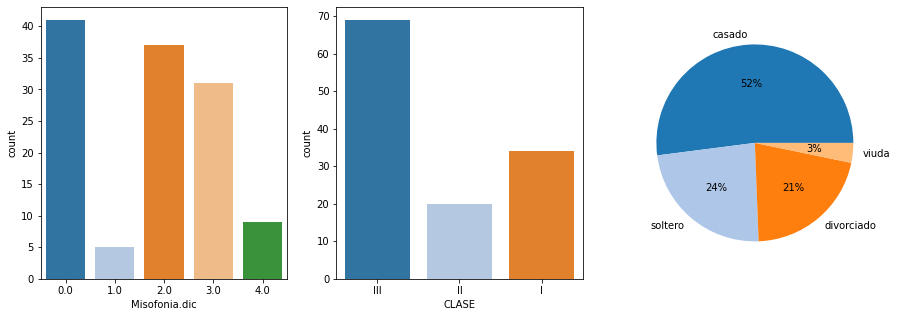

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.countplot(data=df, x='Misofonia.dic', ax=axes[0], palette="tab20")
sns.countplot(data=df, x='CLASE', ax=axes[1], palette="tab20")
maritaldf=df['Estado'].value_counts()
plt.pie(maritaldf,labels=maritaldf.index, colors=sns.color_palette('tab20'), autopct='%.0f%%')
print('The first two graphs shows the number of participants with each Misophonia score and Jaw Class')
print('The third plot reports the proportion of the participants by marital status')

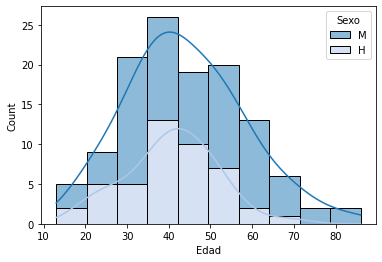

In [ ]:
sns.histplot(data=df, x='Edad', hue='Sexo', kde=True, multiple='stack', palette="tab20")

From this, we understood that there are a wide range of ages, of both genders. The majority of the participants were married, with most of the others either single or divorced. 
There is also a small number of participants that have misophonia scores of 1 and 4, as well as a reduced number of participants with a jaw class of II.
This was taken into account for the rest of the analysis.

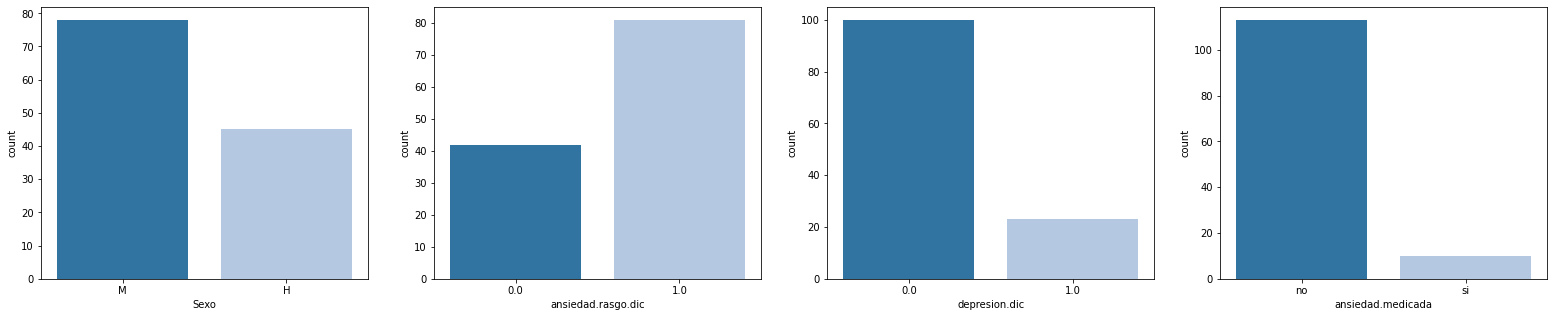

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(27, 5))
sns.countplot(data=df, x='Sexo', ax=axes[0], palette="tab20")
sns.countplot(data=df, x='ansiedad.rasgo.dic', ax=axes[1], palette="tab20")
sns.countplot(data=df, x='depresion.dic', ax=axes[2], palette="tab20")
sns.countplot(data=df, x='ansiedad.medicada', ax=axes[3], palette="tab20")


Plotting the above bar charts allowed us to realise the limitations of the data set. With the examples of prescence of Anxiety (ansiedad.rasgo.dic) and Depression (depresion.dic), each had one category with significantly less people compared to the others. 
This limited the conclusions we could draw and was taken into account during the rest of our analysis.

## Misophonia, Jaw Class and Cephalic Measurements

After plotting various graphs to investigate variables that differed with misofonia severity, we found that jaw classes I and III clearly segregated with no/mild and severe misofonia respectively:

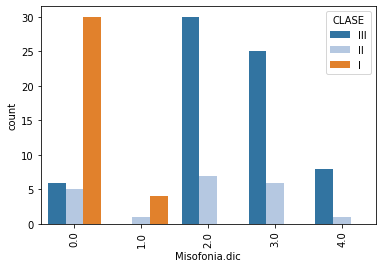

In [ ]:
ax = sns.countplot(data=df, x='Misofonia.dic', hue = 'CLASE', palette="tab20")
ax.tick_params(axis='x', rotation=90)

As jaw class is a discrete variable that depends on (continuous) cephalic measurements, we then asked the question: which cephalic measurements differ between jaw classes? 

This is an interesting question to ask, as if cephalic measurements significantly interact with misophonia severity, a possible explanation could be that differing skull shapes cause sound to be transduced differently, leading to misophonia or more severe misophonia.

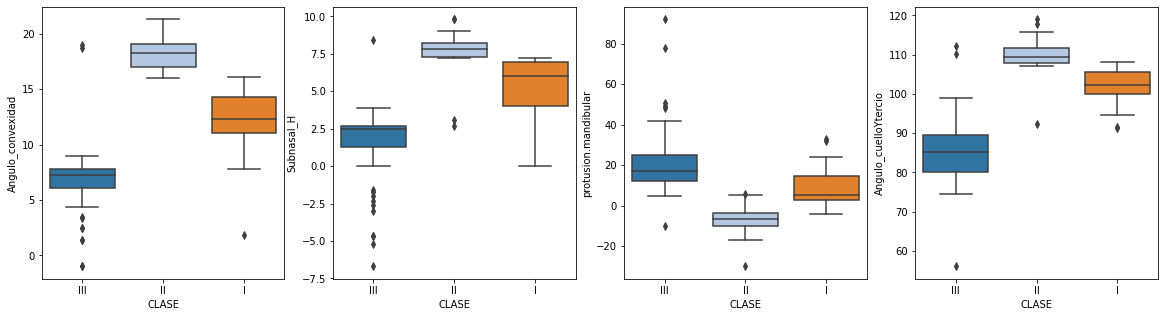

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
sns.boxplot(data=df, x='CLASE', y='Angulo_convexidad', ax=axes[0], palette="tab20")
sns.boxplot(data=df, x='CLASE', y='Subnasal_H', ax=axes[1], palette="tab20")
sns.boxplot(data=df, x='CLASE', y='protusion.mandibular', ax=axes[2], palette="tab20")
sns.boxplot(data=df, x='CLASE', y='Angulo_cuelloYtercio', ax=axes[3], palette="tab20")

From the above box plots, it seems that the distributions of cephalic measurement of participants with jaw class of III are more widely distributed. It is certainly apparent that there are more outliers for class III distributions, compared to classes II and I. The class II distributions appear to have the least variance.

To see if the differences in means, and therefore the distributions, of cephalic measurements between jaw classes were significant, we had to complete statistical tests. Based on the graphs below, we assumed that each cephalic measurement is not normally distributed when segregated by jaw class. Therefore we performed a Kruskal-Wallis (a non-parametric) test on each cephalic measurement.

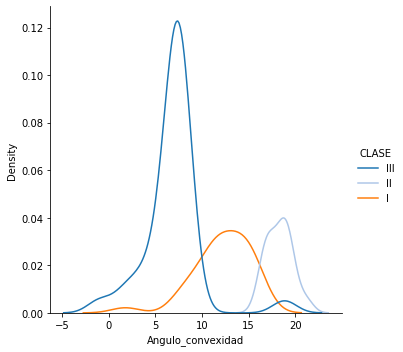

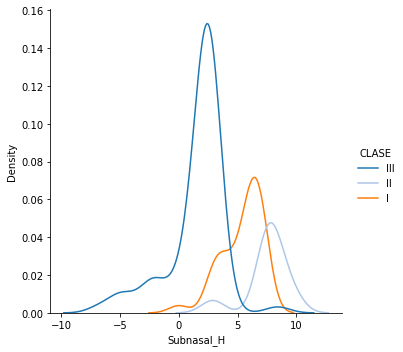

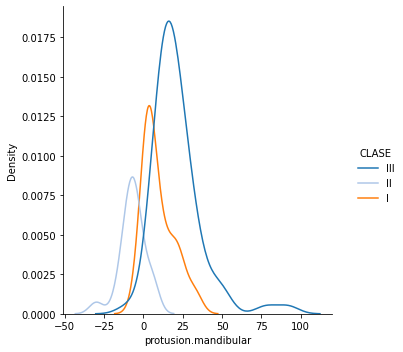

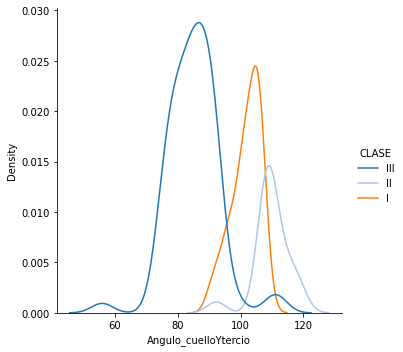

In [ ]:
sns.displot(df, x='Angulo_convexidad', hue="CLASE", kind="kde", palette="tab20")
sns.displot(df, x='Subnasal_H', hue="CLASE", kind="kde", palette="tab20")
sns.displot(df, x='protusion.mandibular', hue="CLASE", kind="kde", palette="tab20")
sns.displot(df, x='Angulo_cuelloYtercio', hue="CLASE", kind="kde", palette="tab20")

The null hypothesis states that there is no significant difference between the means of the cephalic measurement, for each jaw class.

In [ ]:
C1_ang = df[df['CLASE'] == 'I']['Angulo_convexidad']
C2_ang = df[df['CLASE'] == 'II']['Angulo_convexidad']
C3_ang = df[df['CLASE'] == 'III']['Angulo_convexidad']

C1_sub = df[df['CLASE'] == 'I']['Subnasal_H']
C2_sub = df[df['CLASE'] == 'II']['Subnasal_H']
C3_sub = df[df['CLASE'] == 'III']['Subnasal_H']

C1_pro = df[df['CLASE'] == 'I']['protusion.mandibular']
C2_pro = df[df['CLASE'] == 'II']['protusion.mandibular']
C3_pro = df[df['CLASE'] == 'III']['protusion.mandibular']

C1_angC = df[df['CLASE'] == 'I']['Angulo_cuelloYtercio']
C2_angC = df[df['CLASE'] == 'II']['Angulo_cuelloYtercio']
C3_angC = df[df['CLASE'] == 'III']['Angulo_cuelloYtercio']

from scipy import stats
#perform Kruskal-Wallis Test 

print(f"Convexity Angle: {stats.kruskal(C1_ang, C2_ang, C3_ang)}")
print(f"Subnasal Angle: {stats.kruskal(C1_sub, C2_sub, C3_sub)}")
print(f"Jaw Protrusion: {stats.kruskal(C1_pro, C2_pro, C3_pro)}")
print(f"Angle between Jaw and Neck: {stats.kruskal(C1_angC, C2_angC, C3_angC)}")

Convexity Angle: KruskalResult(statistic=81.82710337792167, pvalue=1.7040026523204285e-18)
Subnasal Angle: KruskalResult(statistic=82.56845400090833, pvalue=1.1762185492847934e-18)
Jaw Protrusion: KruskalResult(statistic=58.37976698237154, pvalue=2.1037526322429843e-13)
Angle between Jaw and Neck: KruskalResult(statistic=84.79814620690524, pvalue=3.8575939628201295e-19)


As shown by the small p values in the tests above, we reject the null hypothesis and assume there is a significant difference between all cephalic measurement means when the distribution is spearated by jaw class. 
We then hypothesised that as jaw class differs with misophonia severity, that so do cephalic measurments.

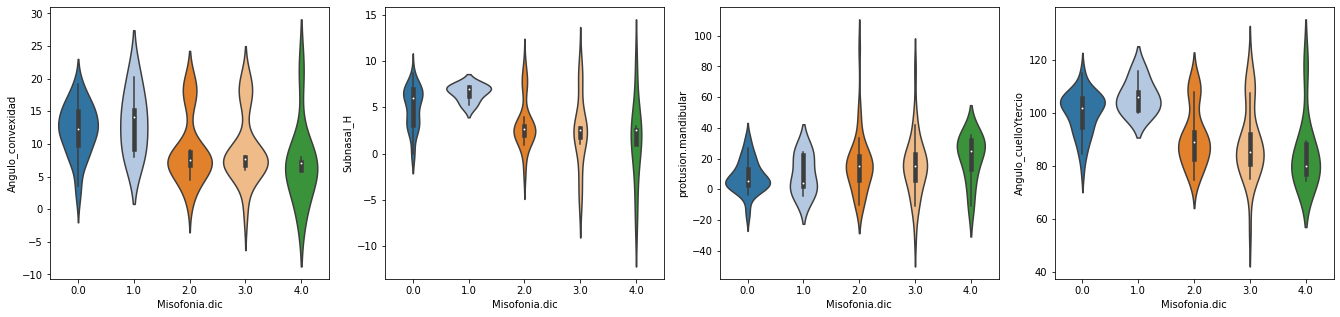

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(23, 5))
sns.violinplot(data=df, x='Misofonia.dic', y='Angulo_convexidad', ax=axes[0], palette="tab20")
sns.violinplot(data=df, x='Misofonia.dic', y='Subnasal_H', ax=axes[1], palette="tab20")
sns.violinplot(data=df, x='Misofonia.dic', y='protusion.mandibular', ax=axes[2], palette="tab20")
sns.violinplot(data=df, x='Misofonia.dic', y='Angulo_cuelloYtercio', ax=axes[3], palette="tab20")

The above plots suggests that the means differ for each cephalic measurment, when the distributions have been segregated by Misofonia severity. Interestingly, the distributions of more severe misophonia scores appear to be more widely distributed.

The violin plots also show that the distributions are not normal, so we carried out Kruskal-Wallis tests on each cephalic measurement.

In [ ]:
m0_ang = df[df['Misofonia.dic'] == 0.0]['Angulo_convexidad']
m1_ang = df[df['Misofonia.dic'] == 1.0]['Angulo_convexidad']
m2_ang = df[df['Misofonia.dic'] == 2.0]['Angulo_convexidad']
m3_ang = df[df['Misofonia.dic'] == 3.0]['Angulo_convexidad']
m4_ang = df[df['Misofonia.dic'] == 4.0]['Angulo_convexidad']

m0_sub = df[df['Misofonia.dic'] == 0.0]['Subnasal_H']
m1_sub = df[df['Misofonia.dic'] == 1.0]['Subnasal_H']
m2_sub = df[df['Misofonia.dic'] == 2.0]['Subnasal_H']
m3_sub = df[df['Misofonia.dic'] == 3.0]['Subnasal_H']
m4_sub = df[df['Misofonia.dic'] == 4.0]['Subnasal_H']

m0_pro = df[df['Misofonia.dic'] == 0.0]['protusion.mandibular']
m1_pro = df[df['Misofonia.dic'] == 1.0]['protusion.mandibular']
m2_pro = df[df['Misofonia.dic'] == 2.0]['protusion.mandibular']
m3_pro = df[df['Misofonia.dic'] == 3.0]['protusion.mandibular']
m4_pro = df[df['Misofonia.dic'] == 4.0]['protusion.mandibular']

m0_angC = df[df['Misofonia.dic'] == 0.0]['Angulo_cuelloYtercio']
m1_angC = df[df['Misofonia.dic'] == 1.0]['Angulo_cuelloYtercio']
m2_angC = df[df['Misofonia.dic'] == 2.0]['Angulo_cuelloYtercio']
m3_angC = df[df['Misofonia.dic'] == 3.0]['Angulo_cuelloYtercio']
m4_angC = df[df['Misofonia.dic'] == 4.0]['Angulo_cuelloYtercio']

from scipy import stats
#perform Kruskal-Wallis Test 

print(f"Convexity Angle: {stats.kruskal(m0_ang, m1_ang, m2_ang, m3_ang, m4_ang)}")
print(f"Subnasal Angle: {stats.kruskal(m0_sub, m1_sub, m2_sub, m3_sub, m4_sub)}")
print(f"Jaw Protrusion: {stats.kruskal(m0_pro, m1_pro, m2_pro, m3_pro, m4_pro)}")
print(f"Angle between Jaw and Neck: {stats.kruskal(m0_angC, m1_angC, m2_angC, m3_angC, m4_angC)}")

Convexity Angle: KruskalResult(statistic=21.820937711311213, pvalue=0.00021755668808758614)
Subnasal Angle: KruskalResult(statistic=23.51326849607802, pvalue=9.997576227728782e-05)
Jaw Protrusion: KruskalResult(statistic=10.009247131834671, pvalue=0.04027220303035368)
Angle between Jaw and Neck: KruskalResult(statistic=26.047163782610824, pvalue=3.09591625840206e-05)


From the above tests, we found that there is a significant difference between Jaw Protrusion means, when the distribution is separated by misophonia severity. Moreover, the differences between means of Convexity Angle, Subnasal Angle and the Angle between the Neck and Jaw, when separated by misofonia score are highly significant; as the p values of their tests are >0.001. 
This makes sense as the distributions are visibily more segregated on the violin plots for the other three, compared to Jaw Protrusion (protusion.mandibular).

These results suggest that differences in cephalic measurements and therefore the skull, could influence the severity of misofonia.
However, we have only identified a correlation. We cannot say from this analysis that differences in these measurements determines misofonia severity.

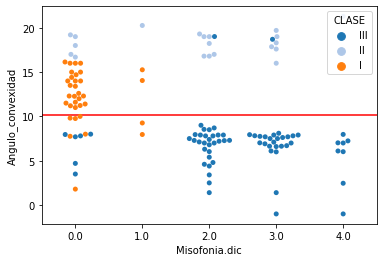

In [ ]:
a = np.mean(df['Angulo_convexidad'])
sns.swarmplot(data=df, x='Misofonia.dic', y='Angulo_convexidad', hue= 'CLASE', palette="tab20")
plt.axhline(a,color='r')

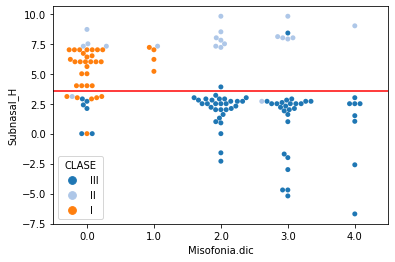

In [ ]:
b = np.mean(df['Subnasal_H'])
sns.swarmplot(data=df, x='Misofonia.dic', y='Subnasal_H', hue= 'CLASE', palette="tab20")
plt.axhline(b,color='r')

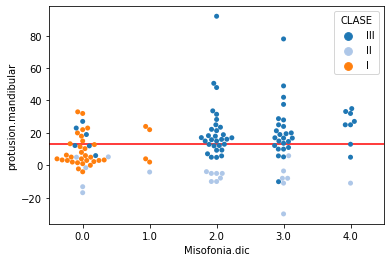

In [ ]:
c = np.mean(df['protusion.mandibular'])
sns.swarmplot(data=df, x='Misofonia.dic', y='protusion.mandibular', hue= 'CLASE', palette="tab20")
plt.axhline(c,color='r')

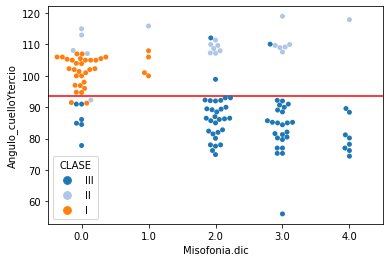

In [ ]:
d = np.mean(df['Angulo_cuelloYtercio'])
sns.swarmplot(data=df, x='Misofonia.dic', y='Angulo_cuelloYtercio', hue= 'CLASE', palette="tab20")
plt.axhline(d,color='r')

However, upon closer inspection of the swarm plots above, we realised that the distributions of Convexity angle, Subnasal Angle and the Angle between the Jaw and Neck clearly segregate by jaw class, at all misophonia severities. The mean of each cephalic measurement is represented by a red line. Jaw protrusion distributions do seem to segregate but to a lesser extent. 

This begs the question: have we analysed the interaction correctly?
Maybe jaw class is the determining factor for misophonia rather than the cephalic measurements themselves.
It seems that a jaw class of I seems to reduce the risk of severe misophonia, while jaw class III appears to be a risk factor for severe misophonia. To address this, we created a contingency table to test whether the observed results significantly differ from the expected results, in a Chi Squared test.

In [ ]:
ct = pd.crosstab(df['Misofonia.dic'],df['CLASE'], margins = True)
ct = ct.rename(columns = {"All":"Row_Totals"})
ct = ct.rename(index = {"All":"Column_Totals"})
ct

CLASE,I,II,III,Row_Totals
Misofonia.dic,,,,
0.0,30,5,6,41
1.0,4,1,0,5
2.0,0,7,30,37
3.0,0,6,25,31
4.0,0,1,8,9
Column_Totals,34,20,69,123


In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(ct)
print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     82.48
p-value:            2.4514e-11
degrees of freedom: 15
expected frequencies:
[[ 11.33333333   6.66666667  23.          41.        ]
 [  1.38211382   0.81300813   2.80487805   5.        ]
 [ 10.22764228   6.01626016  20.75609756  37.        ]
 [  8.56910569   5.04065041  17.3902439   31.        ]
 [  2.48780488   1.46341463   5.04878049   9.        ]
 [ 34.          20.          69.         123.        ]]


This low p value indicates that the observed values are significantly different from the expected values, and reject the null hypothesis that the probabilities of misophonia severity and jaw class are statistically independent. This suggests that the probability of a particular misophonia severity is statistically dependent on the jaw class. 
With the results of all of these statistical tests, we can conclude that there is an interaction between jaw class, cephalic measurements and misophonia severity, in this data set. This would be interesting to investigate with a larger data set.

### Other interactions

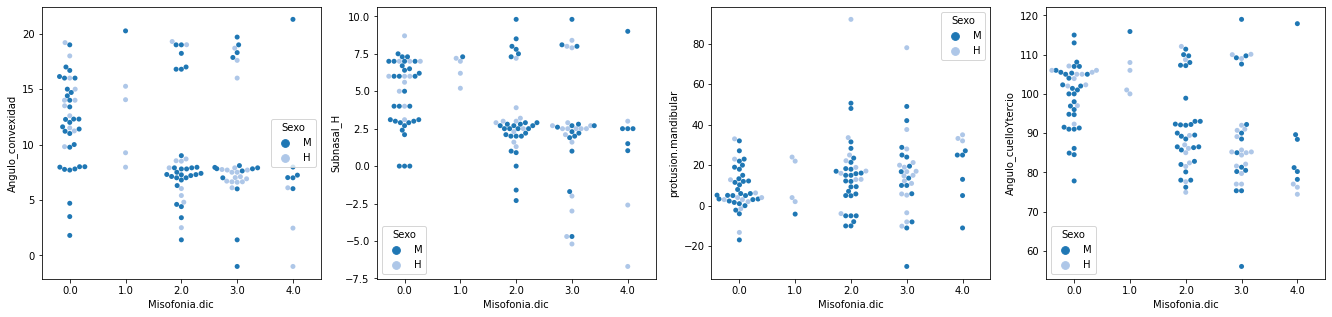

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(23, 5))
sns.swarmplot(data=df, x='Misofonia.dic', y='Angulo_convexidad', hue= 'Sexo', ax=axes[0], palette="tab20")
sns.swarmplot(data=df, x='Misofonia.dic', y='Subnasal_H', hue= 'Sexo', ax=axes[1], palette="tab20")
sns.swarmplot(data=df, x='Misofonia.dic', y='protusion.mandibular', hue= 'Sexo', ax=axes[2], palette="tab20")
sns.swarmplot(data=df, x='Misofonia.dic', y='Angulo_cuelloYtercio', hue= 'Sexo', ax=axes[3], palette="tab20")

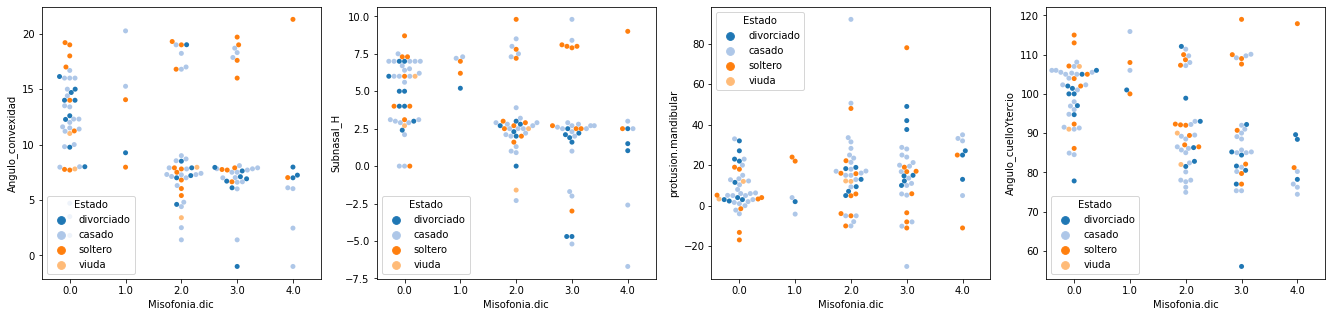

In [ ]:
fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(23, 5))
sns.swarmplot(data=df, x='Misofonia.dic', y='Angulo_convexidad', hue= 'Estado', ax=axes[0], palette="tab20")
sns.swarmplot(data=df, x='Misofonia.dic', y='Subnasal_H', hue= 'Estado', ax=axes[1], palette="tab20")
sns.swarmplot(data=df, x='Misofonia.dic', y='protusion.mandibular', hue= 'Estado', ax=axes[2], palette="tab20")
sns.swarmplot(data=df, x='Misofonia.dic', y='Angulo_cuelloYtercio', hue= 'Estado', ax=axes[3], palette="tab20")

Interestingly, the above plots suggest there is no interaction between cephalic measurements, misophonia and sex or marriage status. With this information, we decided to look investigate the link between misophonia and other variables.

## Anxiety and Depression

### Anxiety and Misophonia

We then decided to investigate the relationship between anxiety and misofonia severity. There is some evidence that appears that it may be caused by a dysfunction of the central auditory system in the brain, not the ears, as the perceived origin and context of the sound appears to be essential to trigger a reaction. This suggests that if the brain chemistry by disorders such as anxiety or depression, this could also affect misophonia.

As the data set contains three different kinds of anxiety information for each participant, we investigated all of them at first: 

* “ansiedad.rasgo”: Score from 0-100 with anxiety personality trait
* “ansiedad.estado”: Score from 0-100 with current state of anxiety
* “ansiedad.medicada”: Diagnosed with anxiety disorder (si, no)

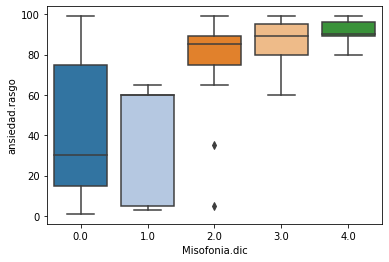

In [ ]:
sns.boxplot(data=df, x='Misofonia.dic', y='ansiedad.rasgo', palette="tab20")

This plot indicates that anxiety personality trait could influence misophonia severity. For cases, other than misophonia severity 3, we can see that the data is skewed, either above or below the median. The distributions also appear to reduce in variance with increasing misophonia severity. 

For this reason, to see if the differences in means of misophonia, between anxiety personality traits were significant, we needed to test this.
Based on the graphs below, we assumed to know that this type of anxiety is not normally distributed, so we performed a (non-parametric) Kruskal-Wallis test on this type of anxiety.

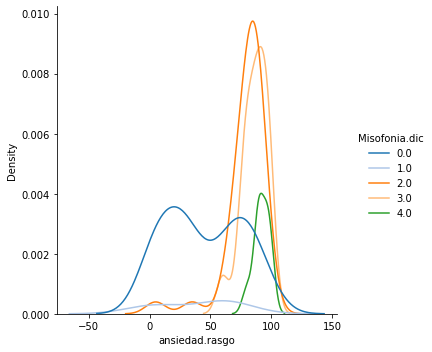

In [ ]:
sns.displot(data=df, x='ansiedad.rasgo', kind="kde", hue = 'Misofonia.dic', palette="tab20")

In [ ]:
C1_anR = df[df['Misofonia.dic'] == 0.0]['ansiedad.rasgo']
C2_anR = df[df['Misofonia.dic'] == 1.0]['ansiedad.rasgo']
C3_anR = df[df['Misofonia.dic'] == 2.0]['ansiedad.rasgo']
C4_anR = df[df['Misofonia.dic'] == 3.0]['ansiedad.rasgo']
C5_anR = df[df['Misofonia.dic'] == 4.0]['ansiedad.rasgo']

from scipy import stats
#perform Kruskal-Wallis Test 

print(f"Anxiety personality trait and Misofonia severity: {stats.kruskal(C1_anR, C2_anR, C3_anR, C4_anR, C5_anR, )}")

Anxiety personality trait and Misofonia severity: KruskalResult(statistic=55.4008775135662, pvalue=2.6775700259832465e-11)


As shown by the small p values in the test above, we reject the null hypothesis, suggesting there is a significant difference between all anxiety personality trait means when the distribution is separated by the severity of misophonia.

We obtained similar results when investigating current anxiety state:

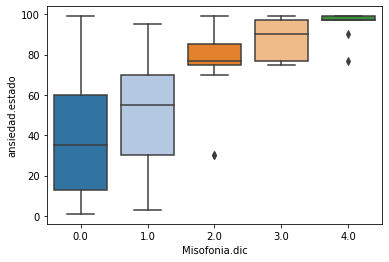

In [ ]:
sns.boxplot(data=df, x='Misofonia.dic', y='ansiedad.estado', palette="tab20")

Again, we can see that the distributions are skewed, either above or below the median, and decreasing variance with increasing misophonia severity. There also appears to be a significant difference between the distributions, which we needed to statistically test.

Based on the graph below, we assumed that current Anxiety state is also not normally distributed. For this reason, we completed a Kruskal-Wallis test.


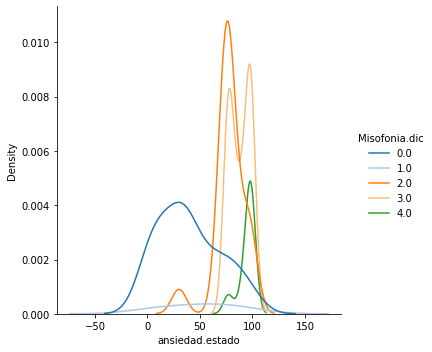

In [ ]:
sns.displot(df, x='ansiedad.estado', hue="Misofonia.dic", kind="kde", palette="tab20")

In [ ]:
C1_anE = df[df['Misofonia.dic'] == 0.0]['ansiedad.estado']
C2_anE = df[df['Misofonia.dic'] == 1.0]['ansiedad.estado']
C3_anE = df[df['Misofonia.dic'] == 2.0]['ansiedad.estado']
C4_anE = df[df['Misofonia.dic'] == 3.0]['ansiedad.estado']
C5_anE = df[df['Misofonia.dic'] == 4.0]['ansiedad.estado']

from scipy import stats
#perform Kruskal-Wallis Test 

print(f"Ansiedad rasgo: {stats.kruskal(C1_anE, C2_anE, C3_anE, C4_anE, C5_anE, )}")

Ansiedad rasgo: KruskalResult(statistic=62.45027378333112, pvalue=8.857070920423172e-13)


This small p value allows us to reject the null hypothesis and therefore suggests that there is a strong correlation between current anxiety state and misophonia severity. 

These results can be explained by the graph below, which shows that Anxiety as both a personality trait and current state are highly correlated.

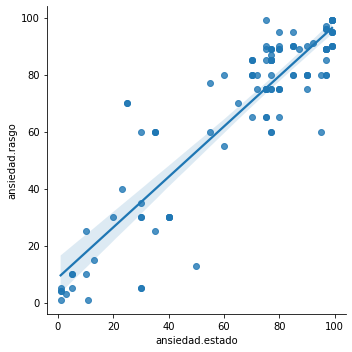

In [ ]:
sns.lmplot(data=df, x='ansiedad.estado', y='ansiedad.rasgo', palette='bright')

In [ ]:
print(stats.spearmanr(df['ansiedad.estado'], df['ansiedad.rasgo']))

SpearmanrResult(correlation=0.8387185215648207, pvalue=9.921842766716556e-34)


As the distribuitons of Anxiety as a personality trait and current state are not normally distributed, we carried out a Spearman's Rank test above. This small p value meant we rejected the null hypothesis, concluding that there is a strong correlation between the two variables. Consequently for the rest of our analysis, we could use either one to perform the corresponding analysis with misophonia.
However, it should be kept in mind that anxiety personality trait refers to the individual tendency to react anxiously, while the state is described as a transient emotional state that fluctuates over time. For that reason in the rest of our analysis, we utilised anxiety as a personality trait (ansiedad.rasgo).

We then decided to investigate if Anxiety, diagnosed as a medical condition, interacts with misophonia severity.

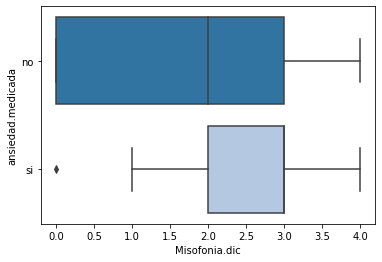

In [ ]:
sns.boxplot(data=df, x='Misofonia.dic', y='ansiedad.medicada', palette="tab20")

In [ ]:
Si_AM=df[df['ansiedad.medicada']=='si']['Misofonia.dic']
No_AM=df[df['ansiedad.medicada']=='no']['Misofonia.dic']
print(f"Anxiety: {stats.ttest_ind(Si_AM, No_AM, equal_var=False)}")

Anxiety: Ttest_indResult(statistic=2.092223415190789, pvalue=0.06070671604831735)


The above p-value > 0.05 meaning that we accepted the null hypothesis, suggesting that misophonia severity was not affected by whether the pariticipant was clinically diagnosed with anxiety.
Furthermore, the plot below and count plot in 'Dataframe Basic Inspection' above both show that there were only 5 participants that were clinically diagnosed with anxiety. The result of our t-test and this fact lead us to make the decision not to investigate this variable further.


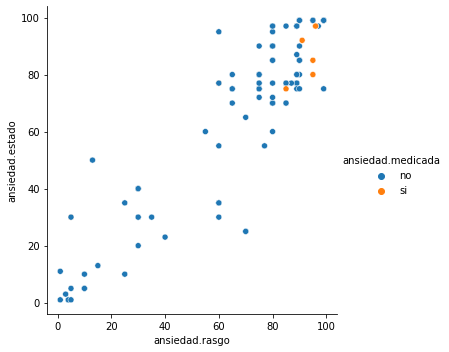

In [ ]:
sns.relplot(data=df,x='ansiedad.rasgo',y='ansiedad.estado',hue='ansiedad.medicada')

### Anxiety, Depression and Misophonia

As it is well known that anxiety and depression are often correlated, we analysed the relationship between misophonia severity, anxiety and depression. First, we tested if anxiety and depression were also correlated in our data set:

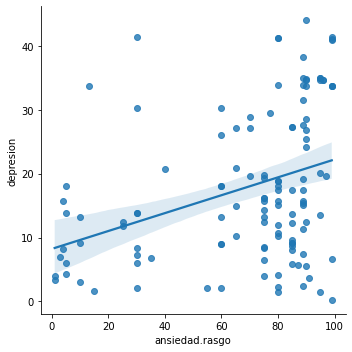

In [ ]:
sns.lmplot(data=df, x='ansiedad.rasgo', y='depresion', palette='bright')

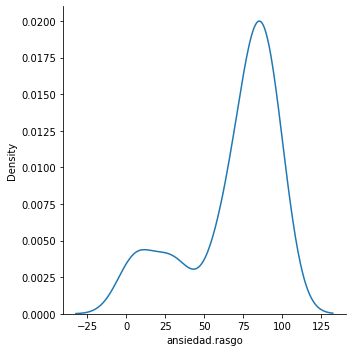

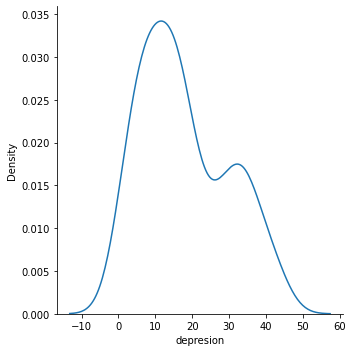

In [ ]:
sns.displot(data=df, x='ansiedad.rasgo', kind="kde",palette="bright")
sns.displot(data=df, x='depresion', kind="kde",palette="bright")

In [ ]:
print(stats.spearmanr(df['ansiedad.estado'], df['depresion']))

SpearmanrResult(correlation=0.3576063584246613, pvalue=4.893199116087293e-05)


To test is there is a correlation between anxiety and depression we carried out a Spearman's rank correlation test. We chose this test as the above density plots demonstrate that neither anxiety or depression have normal distributions. The small p-value allowed us to reject the null hypothesis and conclude that anxiety and depression strongly correlated in our data set.

As a result, we then investigated the link between anxiety, depression and misophonia severity:

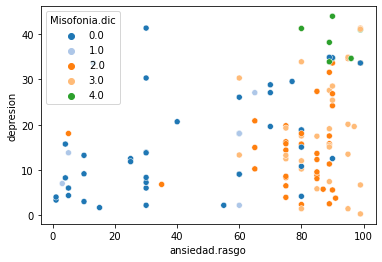

In [ ]:
sns.scatterplot(data=df, x='ansiedad.rasgo', y='depresion', hue='Misofonia.dic', palette="tab20")

As shown above, data points corresponding to severe misophonia are concentrated in the right part of the plot where anxiety score is also high. As this plot is quite complex, we decided to disect the data set, investigating anxiety and depression separately.


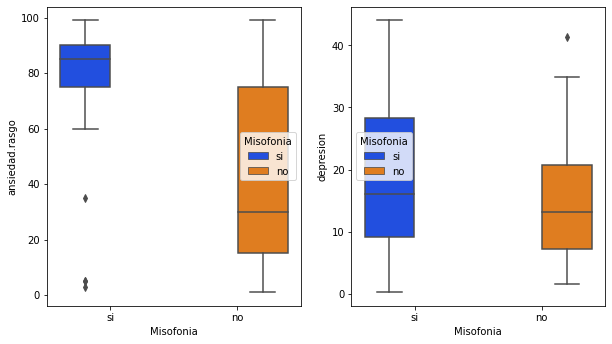

In [ ]:
fig, axes =plt.subplots(nrows = 1,ncols=2, figsize=(10,5.5))
sns.boxplot(data=df, x='Misofonia',y='ansiedad.rasgo', hue='Misofonia', ax=axes[0], palette="bright")
sns.boxplot(data=df, x='Misofonia',y='depresion', hue='Misofonia', ax=axes[1], palette="bright")

We can see that the anxiety distributes differently for people with and without misophonia, which is to be expected. Surprisingly, the distributions of depression for those with and and without misophonia do not appear so different. However, we had to statistically test this.

We carried out a t-test to test if differences between means of anxiety/depression for people with misophonia were significantly different to the mean of people without misophonia. Our samples are large enough, and also we will consider that their means distribute normally. 

In [ ]:
Si_A=df[df['Misofonia']=='si']['ansiedad.rasgo']
No_A=df[df['Misofonia']=='no']['ansiedad.rasgo']
print('Anxiety: ', stats.ttest_ind(Si_A, No_A, equal_var=False))

Si_A=df[df['Misofonia']=='si']['depresion']
No_A=df[df['Misofonia']=='no']['depresion']
print('Depression: ', stats.ttest_ind(Si_A, No_A, equal_var=False))


Anxiety:  Ttest_indResult(statistic=6.845935758040755, pvalue=6.617894920500896e-09)
Depression:  Ttest_indResult(statistic=1.569434381133438, pvalue=0.12016276920643687)


The p-value for anxiety is very small, so we can reject the null hypothesis, showing that mean anxiety score is significantly higher for people who have misophonia compared without misophonia.

On the other hand, the p-value for depression is 0.12 which is greater than 0.05. Consequently, we accept the null hypothesis, indicating that mean depression score doesn't differ significantly for people with and without misophonia.


## Intersection Between Cephalic Measurments, Anxiety and Misofonia

As we found correlations between cephalic measurements and misophonia severity as well as anxiety and misophonia severity, we wanted to investigate if there is a correlation between cephalic measurements and anxiety.

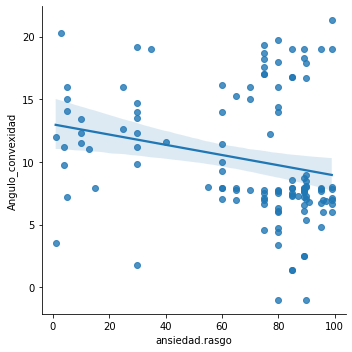

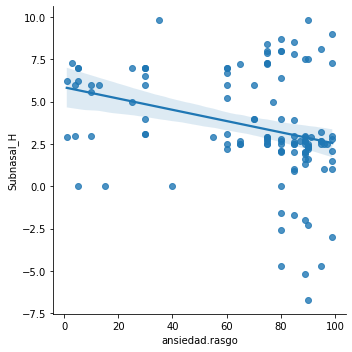

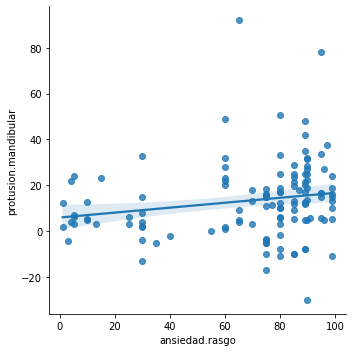

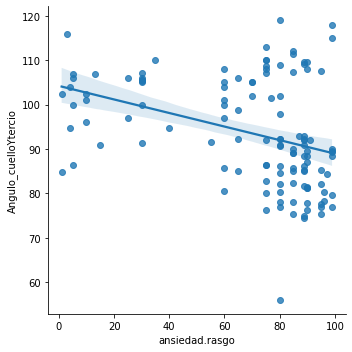

In [ ]:
sns.lmplot(data=df, x='ansiedad.rasgo', y='Angulo_convexidad', palette='bright')
sns.lmplot(data=df, x='ansiedad.rasgo', y='Subnasal_H', palette='bright')
sns.lmplot(data=df, x='ansiedad.rasgo', y='protusion.mandibular', palette='bright')
sns.lmplot(data=df, x='ansiedad.rasgo', y='Angulo_cuelloYtercio', palette='bright')

In [ ]:
print(f" Anxiety and Convexity Angle correlation:  {stats.spearmanr(df['ansiedad.rasgo'], df['Angulo_convexidad'])}")
print(f" Anxiety and Subnasal Angle correlation:  {stats.spearmanr(df['ansiedad.rasgo'], df['Subnasal_H'])}")
print(f" Anxiety and Jaw Protrusion correlation:  {stats.spearmanr(df['ansiedad.rasgo'], df['protusion.mandibular'])}")
print(f" Anxiety and Angle between the Neck and Jaw correlation:  {stats.spearmanr(df['ansiedad.rasgo'], df['Angulo_cuelloYtercio'])}")

 Anxiety and Convexity Angle correlation:  SpearmanrResult(correlation=-0.30943417458812444, pvalue=0.0004965133157777781)
 Anxiety and Subnasal Angle correlation:  SpearmanrResult(correlation=-0.36991002952952107, pvalue=2.5426698978294204e-05)
 Anxiety and Jaw Protrusion correlation:  SpearmanrResult(correlation=0.2791379292453849, pvalue=0.0017685729626963657)
 Anxiety and Angle between the Neck and Jaw correlation:  SpearmanrResult(correlation=-0.3945246120713218, pvalue=6.320862769881445e-06)


These results indicate that there is also a correlation with anxiety and cephalic measurements. Whether this is due to the correlation in misophonia, we cannot be sure. To know, a larger data set would have to be analysed and more tests completed.

# Conclusions

In our investgation, we have inspected the link between cepahlic measurements, anxiety, depression and misofonia. We have found significant interactions between each of the variables which suggests that misofonia is a complicated condition that can depend on a great number of characteristics. 
Our analysis suggests that there is a strong interaction between cephalic measurements and misophonia severity as well as between anxiety and misophonia severity.
This could be for a number of reasons: in the case of cephalic measurements, possessing a class III jaw is an indicator of a more severe growth condition or other skeletal abnormalities. This could impact the way sound is transduced, therefore making the individual more at risk of misophonia.
In the case of anxiety, the relationship could be causal in either direction; severe misophonia could lead to stronger anxiety, or the brain chemistry of anxious people is more conducive to severe misophonia. 
However, for us to draw any of these conclusions, further data collection, analysis and tests would have to be carried out.

There are limitations to our analysis: firstly, our sample size was not large enough to say that our investigation can be applied to all persons with misofonia, with any certainty. For this, we could need to repeat our analysis on many more data sets with more pariticipants. 
Furthermore, for a number of categories for which these was a very small number of individuals (for example persons with misophonia severity 1.0). This limits the conclusions we can draw. Ideally, a larger study would be carried out with more participants, to reduce this problem.